In [103]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [136]:
#Define the data provided
N = 2000
s = 0.001
J = 4
S = np.linspace(0.001, 1)
initial_values = np.random.randn(J) 

# Define the target distribution and its log
def target(x): 
    return 0.5*np.exp(-np.abs(x))

def log_target(x):
    return np.log(0.5) - np.abs(x)


#Generate chains to compute the value of Rhat
def mcmc(N,J,s,x0):
    chain = np.zeros(N)
    chain[0] = x0
    
    for i in range(1, N):
        x_new = norm.rvs(loc=chain[i-1], scale=s)  # Propose a new state
        log_A = log_target(x_new) - log_target(chain[i-1])  # Define log of the acceptance ratio
        log_u = np.log(uniform.rvs())  # Log of uniform random number

        if log_u < log_A:
            chain[i] = x_new  # Accept new value
        else:
            chain[i] = chain[i-1]  # Reject and go back to previous value

    return chain

#output for the mcmc sampling using J=4
mcmc_output = [mcmc(N,J,s,x0) for x0 in initial_values]
mcmc_output


[array([-0.31895859, -0.31824572, -0.31902539, ..., -0.29969658,
        -0.29994183, -0.2996923 ]),
 array([-1.68648549, -1.68620985, -1.68475679, ..., -1.7216722 ,
        -1.72213151, -1.72299519]),
 array([-0.00707919, -0.00673885, -0.00730139, ..., -0.01570118,
        -0.01612889, -0.01431999]),
 array([0.48060173, 0.48113353, 0.48290024, ..., 0.48926096, 0.48960409,
        0.48787226])]

In [130]:
#function to find Rhat

def Rhat(N, s, J, initial_values):
    Mj = np.mean(mcmc_output)
    Vj = np.var(mcmc_output) 
    W = np.mean(Vj) 
    M = np.mean(Mj)
    B = np.var(Mj)
    Rhat = np.sqrt((B+W) / W)
    return Rhat


In [131]:
# Find Rhat when s = 0.001
Rhat_1 = Rhat(N, s, J, initial_values)

In [132]:
# Find Rhat when S = np.arange(0.001,1, step=100)
Rhat_2 = [Rhat(N, s, J, initial_values) for s in S]

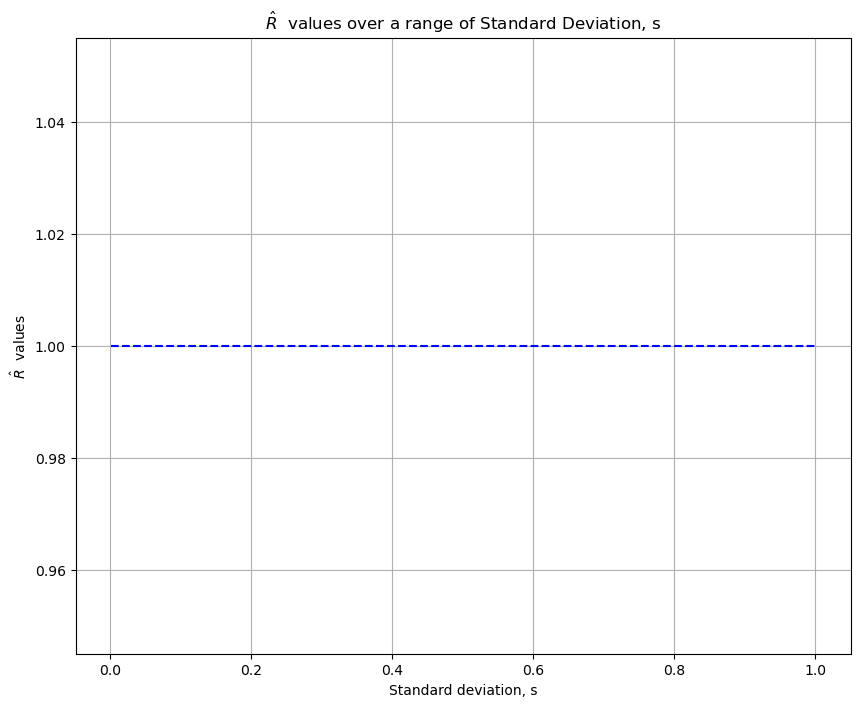

In [133]:
#N and J fixed, plot values of Rhat over a grid of S = np.linspace(0.001, 1)

plt.figure(figsize=(10,8))
plt.plot(S, Rhat_2, 'b--')
plt.title('$\hat{R}$  values over a range of Standard Deviation, s')
plt.ylabel('$\hat{R}$  values')
plt.xlabel('Standard deviation, s')

plt.grid()
plt.show
#save graph to file
plt.savefig('Rhat.png')
